In [1]:
import sys
sys.path.append("../model/region")

import cv2
import numpy as np

import matplotlib.pyplot as plt

from growregion import GrowRegion
from growcut import GrowCut

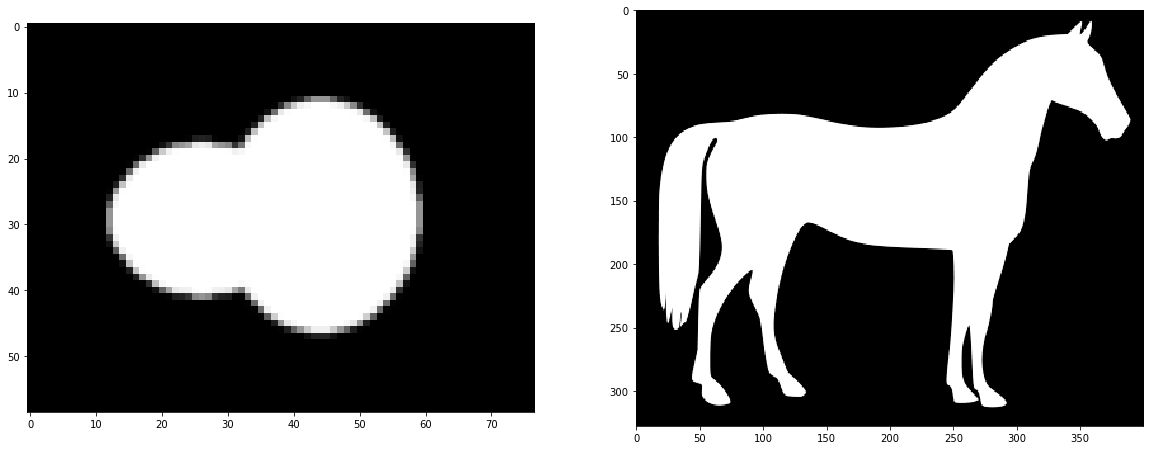

In [9]:
# Load sample image
imsample_gourd = cv2.imread("../asset/gourd.png")[..., 0].astype(np.uint8)
imsample_horse = cv2.imread("../asset/horse.png")[..., 0].astype(np.uint8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].imshow(imsample_gourd, cmap='Greys')
axes[1].imshow(imsample_horse, cmap='Greys')

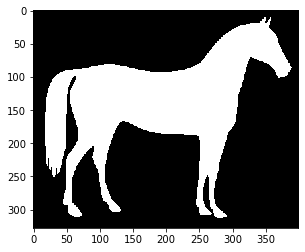

In [10]:
## Region growing

# Get input dimensions
height, width = imsample_horse.shape

# Add seed points
seed = np.zeros_like(imsample_horse, dtype=np.uint8)
seed[0, 0] = 1

# Define model
model = GrowRegion()

# Run
region = model.run(imsample_horse, seed)

# Plot
plt.imshow(255*region, cmap="Greys")

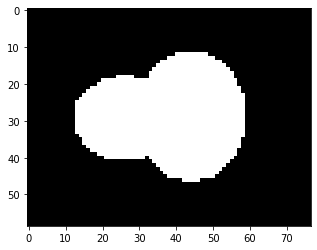

In [14]:
## Grow-cut

# Get input dimensions
height, width = imsample_gourd.shape

# Add seed points
seed = np.zeros_like(imsample_gourd, dtype=np.uint8)
seed[0, 0], seed[height//2, width//2] = 2, 1

# Define model
model = GrowCut()

# Run
region = model.run(imsample_gourd, seed)

# Plot
plt.imshow(255*region, cmap="Greys")